<a href="https://colab.research.google.com/github/SuryaR08/Oasis-InfoByte/blob/main/Iris_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
# Creating a dataframe
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['target']=df['target'].astype('int')
df['target'].dtypes

dtype('int64')

In [ ]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
## Checking the numm values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
## Checking for missing values
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
## scaling
X = df[iris['feature_names']]
y = df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_scaled = pd.DataFrame(data=X_scaled, columns=iris['feature_names'])
df_scaled['target'] = y

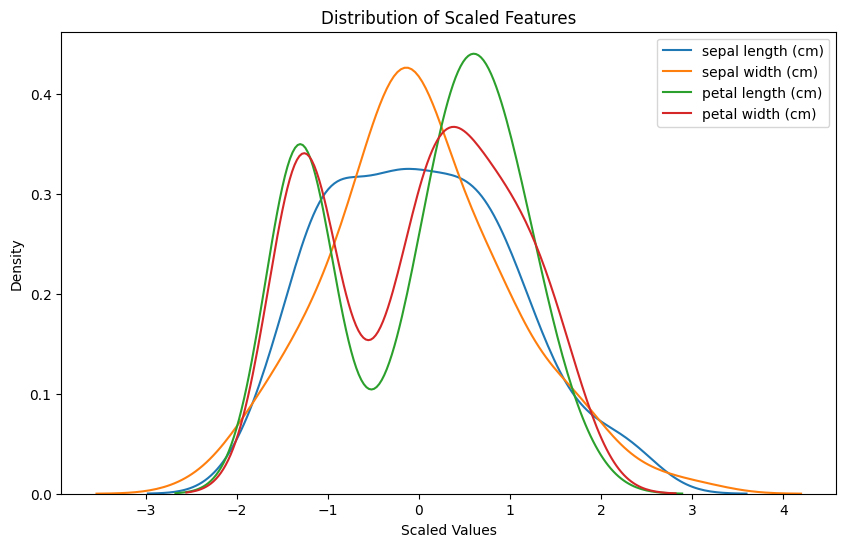

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the scaled feature values
plt.figure(figsize=(10, 6))
for feature in iris['feature_names']:
    sns.kdeplot(df_scaled[feature], label=feature)
plt.xlabel('Scaled Values')
plt.ylabel('Density')
plt.title('Distribution of Scaled Features')
plt.legend()
plt.show()

In [ ]:
#model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, accuracy in sorted_results:
    print(f'{name}: {accuracy}')

Decision Tree: 1.0
K-Nearest Neighbors: 1.0
Logistic Regression: 1.0
Support Vector Machine: 1.0
Random Forest: 1.0
Naive Bayes: 1.0


# **We can observe that every classification model gives 100% accuracy**